In [3]:
import random

In [4]:
import pandas as pd
import zipfile

In [5]:
datapath=r"C:\Users\santh\OneDrive\Desktop\football.zip"

In [6]:
df=pd.read_csv(datapath,compression='zip')

In [7]:
df

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Argentina,France,1,NaN,NaN,0,NaN,NaN,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960,Yugoslavia,Brazil,2,NaN,NaN,1,NaN,NaN,Bosko Simonovic,Milutin Ivković,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961,Romania,Peru,3,NaN,NaN,1,NaN,NaN,Octav Luchide,Emerich Vogl,...,NaN,NaN,NaN,Plácido Galindo · 70,NaN,NaN,NaN,NaN,NaN,NaN
962,United States,Belgium,3,NaN,NaN,0,NaN,NaN,Bob Millar,Tom Florie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'home_manager', 'home_captain',
       'away_manager', 'away_captain', 'Attendance', 'Venue', 'Officials',
       'Round', 'Date', 'Score', 'Referee', 'Notes', 'Host', 'Year',
       'home_goal', 'away_goal', 'home_goal_long', 'away_goal_long',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card', 'home_yellow_card_long',
       'away_yellow_card_long', 'home_substitute_in_long',
       'away_substitute_in_long'],
      dtype='object')

In [9]:
df['home_team'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 964 entries, 0 to 963
Series name: home_team
Non-Null Count  Dtype 
--------------  ----- 
964 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


In [10]:
df['home_team'].value_counts()

home_team
Brazil                  85
Argentina               59
Italy                   57
England                 40
Germany                 40
                        ..
China PR                 1
United Arab Emirates     1
Norway                   1
Bolivia                  1
Haiti                    1
Name: count, Length: 82, dtype: int64

In [11]:
df['Score'].value_counts()

Score
1–0    118
2–1    107
1–1     75
2–0     71
0–0     66
      ... 
7–3      1
5–7      1
7–2      1
8–3      1
6–5      1
Name: count, Length: 71, dtype: int64

In [12]:
scoreabovezero=df['Score']>'0-0'

In [13]:
df[scoreabovezero].shape

(929, 44)

In [14]:
scorebyBrazil=df['home_team']=='Brazil'

In [15]:
df[scoreabovezero & scorebyBrazil]

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
11,Brazil,Korea Republic,4,3.6,NaN,1,0.5,NaN,Tite,Thiago Silva,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['44&rsquor;|4:0|Jung Woo-young'],"['63&rsquor;|4:0|Dani Alves|for Éder Militão',...","['46&rsquor;|4:0|Hong Chul|for Kim Jin-su', '4..."
34,Brazil,Switzerland,1,1.0,NaN,0,0.3,NaN,Tite,Thiago Silva,...,NaN,NaN,NaN,NaN,NaN,NaN,['52&rsquor;|0:0|Fred'],['50&rsquor;|0:0|Fabian Rieder'],"['46&rsquor;|0:0|Rodrygo|for Lucas Paquetá', '...",['59&rsquor;|0:0|Edimilson Fernandes|for Ruben...
51,Brazil,Serbia,2,2.4,NaN,0,0.2,NaN,Tite,Thiago Silva,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['7&rsquor;|0:0|Strahinja Pavlović', '49&rsquo...","['75&rsquor;|2:0|Fred|for Lucas Paquetá', '76&...",['57&rsquor;|0:0|Ivan Ilić|for Nemanja Gudelj'...
71,Brazil,Belgium,1,2.8,NaN,2,0.5,NaN,Tite,Miranda,...,NaN,NaN,NaN,NaN,NaN,NaN,"['85&rsquor;|1:2|Fernandinho', '90&rsquor;|1:2...","['47&rsquor;|0:2|Toby Alderweireld', '71&rsquo...","['46&rsquor;|0:2|Roberto Firmino|for Willian',...",['83&rsquor;|1:2|Thomas Vermaelen|for Nacer Ch...
74,Brazil,Mexico,2,2.7,NaN,0,0.7,NaN,Tite,Thiago Silva,...,NaN,NaN,NaN,NaN,NaN,NaN,"['43&rsquor;|0:0|Filipe Luís', '59&rsquor;|1:0...","['38&rsquor;|0:0|Edson Álvarez', '55&rsquor;|1...","['80&rsquor;|1:0|Fernandinho|for Paulinho', '8...",['46&rsquor;|0:0|Miguel Layún|for Rafael Márqu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,Brazil,Sweden,4,NaN,NaN,2,NaN,NaN,Ademar Pimenta,Leônidas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
915,Brazil,Czechoslovakia,2,NaN,NaN,1,NaN,NaN,Ademar Pimenta,Leônidas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
917,Brazil,Czechoslovakia,1,NaN,NaN,1,NaN,NaN,Ademar Pimenta,Martim Mércio da Silveira,...,NaN,NaN,Zezé Procópio · 14|Arthur Machado · 89,Jan Říha · 89,NaN,NaN,NaN,NaN,NaN,NaN
926,Brazil,Poland,6,NaN,NaN,5,NaN,NaN,Ademar Pimenta,Martim Mércio da Silveira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df[scoreabovezero & scorebyBrazil].sort_values(by='home_score')

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
129,Brazil,Netherlands,0,NaN,NaN,3,NaN,NaN,Luiz Felipe Scolari,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['2&rsquor;|0:0|Thiago Silva', '54&rsquor;|0:2...","['9&rsquor;|0:1|Arjen Robben', '36&rsquor;|0:2...",['46&rsquor;|0:2|Fernandinho|for Luiz Gustavo'...,['70&rsquor;|0:2|Daryl Janmaat|for Daley Blind...
176,Brazil,Mexico,0,NaN,NaN,0,NaN,NaN,Luiz Felipe Scolari,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['45&rsquor;|0:0|Ramires', '79&rsquor;|0:0|Thi...","['59&rsquor;|0:0|Paul Aguilar', '62&rsquor;|0:...","['46&rsquor;|0:0|Bernard|for Ramires', '68&rsq...",['74&rsquor;|0:0|Javier Hernández|for Oribe Pe...
261,Brazil,France,0,NaN,NaN,1,NaN,NaN,Carlos Alberto Parreira,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['25&rsquor;|0:0|Cafú', '45&rsquor;|0:0|Juan',...","['74&rsquor;|0:1|Willy Sagnol', '87&rsquor;|0:...",['63&rsquor;|0:1|Adriano|for Juninho Pernambuc...,['77&rsquor;|0:1|Sidney Govou|for Franck Ribér...
384,Brazil,France,0,NaN,NaN,3,NaN,NaN,Mário Zagallo,NaN,...,NaN,NaN,NaN,NaN,NaN,Marcel Desailly · 68,['33&rsquor;|0:1|Júnior Baiano'],"['39&rsquor;|0:1|Didier Deschamps', '48&rsquor...",['46&rsquor;|0:2|Denílson Custódio Machado|for...,['57&rsquor;|0:2|Alain Boghossian|for Christia...
731,Brazil,Yugoslavia,0,NaN,NaN,0,NaN,NaN,Mario Zagallo,Wilson da Silva Piazza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['17&rsquor;|0:0|Branko Oblak', '49&rsquor;|0:...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,Brazil,Mexico,5,NaN,NaN,0,NaN,NaN,Zeze Moreira,Bauer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
831,Brazil,France,5,NaN,NaN,2,NaN,NaN,Vicente Feola,Hilderaldo Bellini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,Brazil,Poland,6,NaN,NaN,5,NaN,NaN,Ademar Pimenta,Martim Mércio da Silveira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891,Brazil,Spain,6,NaN,NaN,1,NaN,NaN,Flavio Costa,Augusto da Costa,...,NaN,NaN,NaN,NaN,NaN,NaN,['1&rsquor;|0:0|Bigode'],NaN,NaN,NaN


In [18]:
df[scoreabovezero & scorebyBrazil].sort_values(by='home_score',ascending=False)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
893,Brazil,Sweden,7,NaN,NaN,1,NaN,NaN,Flavio Costa,Augusto da Costa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891,Brazil,Spain,6,NaN,NaN,1,NaN,NaN,Flavio Costa,Augusto da Costa,...,NaN,NaN,NaN,NaN,NaN,NaN,['1&rsquor;|0:0|Bigode'],NaN,NaN,NaN
926,Brazil,Poland,6,NaN,NaN,5,NaN,NaN,Ademar Pimenta,Martim Mércio da Silveira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
831,Brazil,France,5,NaN,NaN,2,NaN,NaN,Vicente Feola,Hilderaldo Bellini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
828,Brazil,Sweden,5,NaN,NaN,2,NaN,NaN,Vicente Feola,Hilderaldo Bellini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,Brazil,France,0,NaN,NaN,3,NaN,NaN,Mário Zagallo,NaN,...,NaN,NaN,NaN,NaN,NaN,Marcel Desailly · 68,['33&rsquor;|0:1|Júnior Baiano'],"['39&rsquor;|0:1|Didier Deschamps', '48&rsquor...",['46&rsquor;|0:2|Denílson Custódio Machado|for...,['57&rsquor;|0:2|Alain Boghossian|for Christia...
695,Brazil,Poland,0,NaN,NaN,1,NaN,NaN,Mario Zagallo,Marinho Peres,...,NaN,NaN,NaN,NaN,NaN,NaN,['76&rsquor;|0:1|Jairzinho'],['71&rsquor;|0:0|Henryk Kasperczak'],['66&rsquor;|0:0|Mirandinha|for Ademir da Guia'],['73&rsquor;|0:0|Lesław Ćmikiewicz|for Henryk ...
731,Brazil,Yugoslavia,0,NaN,NaN,0,NaN,NaN,Mario Zagallo,Wilson da Silva Piazza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['17&rsquor;|0:0|Branko Oblak', '49&rsquor;|0:...",NaN,NaN
817,Brazil,Czechoslovakia,0,NaN,NaN,0,NaN,NaN,Aymore Moreira,Mauro Ramos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df[scoreabovezero & scorebyBrazil].sort_values(by='home_score',ascending=True)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
129,Brazil,Netherlands,0,NaN,NaN,3,NaN,NaN,Luiz Felipe Scolari,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['2&rsquor;|0:0|Thiago Silva', '54&rsquor;|0:2...","['9&rsquor;|0:1|Arjen Robben', '36&rsquor;|0:2...",['46&rsquor;|0:2|Fernandinho|for Luiz Gustavo'...,['70&rsquor;|0:2|Daryl Janmaat|for Daley Blind...
176,Brazil,Mexico,0,NaN,NaN,0,NaN,NaN,Luiz Felipe Scolari,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['45&rsquor;|0:0|Ramires', '79&rsquor;|0:0|Thi...","['59&rsquor;|0:0|Paul Aguilar', '62&rsquor;|0:...","['46&rsquor;|0:0|Bernard|for Ramires', '68&rsq...",['74&rsquor;|0:0|Javier Hernández|for Oribe Pe...
261,Brazil,France,0,NaN,NaN,1,NaN,NaN,Carlos Alberto Parreira,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['25&rsquor;|0:0|Cafú', '45&rsquor;|0:0|Juan',...","['74&rsquor;|0:1|Willy Sagnol', '87&rsquor;|0:...",['63&rsquor;|0:1|Adriano|for Juninho Pernambuc...,['77&rsquor;|0:1|Sidney Govou|for Franck Ribér...
384,Brazil,France,0,NaN,NaN,3,NaN,NaN,Mário Zagallo,NaN,...,NaN,NaN,NaN,NaN,NaN,Marcel Desailly · 68,['33&rsquor;|0:1|Júnior Baiano'],"['39&rsquor;|0:1|Didier Deschamps', '48&rsquor...",['46&rsquor;|0:2|Denílson Custódio Machado|for...,['57&rsquor;|0:2|Alain Boghossian|for Christia...
731,Brazil,Yugoslavia,0,NaN,NaN,0,NaN,NaN,Mario Zagallo,Wilson da Silva Piazza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['17&rsquor;|0:0|Branko Oblak', '49&rsquor;|0:...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,Brazil,Mexico,5,NaN,NaN,0,NaN,NaN,Zeze Moreira,Bauer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
831,Brazil,France,5,NaN,NaN,2,NaN,NaN,Vicente Feola,Hilderaldo Bellini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,Brazil,Poland,6,NaN,NaN,5,NaN,NaN,Ademar Pimenta,Martim Mércio da Silveira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891,Brazil,Spain,6,NaN,NaN,1,NaN,NaN,Flavio Costa,Augusto da Costa,...,NaN,NaN,NaN,NaN,NaN,NaN,['1&rsquor;|0:0|Bigode'],NaN,NaN,NaN


In [20]:
brazildf=df[scoreabovezero & scorebyBrazil].sort_values(by='home_score',ascending=True)

In [21]:
brazildf

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
129,Brazil,Netherlands,0,NaN,NaN,3,NaN,NaN,Luiz Felipe Scolari,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['2&rsquor;|0:0|Thiago Silva', '54&rsquor;|0:2...","['9&rsquor;|0:1|Arjen Robben', '36&rsquor;|0:2...",['46&rsquor;|0:2|Fernandinho|for Luiz Gustavo'...,['70&rsquor;|0:2|Daryl Janmaat|for Daley Blind...
176,Brazil,Mexico,0,NaN,NaN,0,NaN,NaN,Luiz Felipe Scolari,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['45&rsquor;|0:0|Ramires', '79&rsquor;|0:0|Thi...","['59&rsquor;|0:0|Paul Aguilar', '62&rsquor;|0:...","['46&rsquor;|0:0|Bernard|for Ramires', '68&rsq...",['74&rsquor;|0:0|Javier Hernández|for Oribe Pe...
261,Brazil,France,0,NaN,NaN,1,NaN,NaN,Carlos Alberto Parreira,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['25&rsquor;|0:0|Cafú', '45&rsquor;|0:0|Juan',...","['74&rsquor;|0:1|Willy Sagnol', '87&rsquor;|0:...",['63&rsquor;|0:1|Adriano|for Juninho Pernambuc...,['77&rsquor;|0:1|Sidney Govou|for Franck Ribér...
384,Brazil,France,0,NaN,NaN,3,NaN,NaN,Mário Zagallo,NaN,...,NaN,NaN,NaN,NaN,NaN,Marcel Desailly · 68,['33&rsquor;|0:1|Júnior Baiano'],"['39&rsquor;|0:1|Didier Deschamps', '48&rsquor...",['46&rsquor;|0:2|Denílson Custódio Machado|for...,['57&rsquor;|0:2|Alain Boghossian|for Christia...
731,Brazil,Yugoslavia,0,NaN,NaN,0,NaN,NaN,Mario Zagallo,Wilson da Silva Piazza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['17&rsquor;|0:0|Branko Oblak', '49&rsquor;|0:...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,Brazil,Mexico,5,NaN,NaN,0,NaN,NaN,Zeze Moreira,Bauer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
831,Brazil,France,5,NaN,NaN,2,NaN,NaN,Vicente Feola,Hilderaldo Bellini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,Brazil,Poland,6,NaN,NaN,5,NaN,NaN,Ademar Pimenta,Martim Mércio da Silveira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891,Brazil,Spain,6,NaN,NaN,1,NaN,NaN,Flavio Costa,Augusto da Costa,...,NaN,NaN,NaN,NaN,NaN,NaN,['1&rsquor;|0:0|Bigode'],NaN,NaN,NaN


In [22]:
brazildf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 129 to 893
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   home_team                        81 non-null     object 
 1   away_team                        81 non-null     object 
 2   home_score                       81 non-null     int64  
 3   home_xg                          7 non-null      float64
 4   home_penalty                     0 non-null      float64
 5   away_score                       81 non-null     int64  
 6   away_xg                          7 non-null      float64
 7   away_penalty                     0 non-null      float64
 8   home_manager                     81 non-null     object 
 9   home_captain                     59 non-null     object 
 10  away_manager                     81 non-null     object 
 11  away_captain                     59 non-null     object 
 12  Attendance                

In [24]:
%matplotlib inline

In [25]:
from matplotlib import pyplot as plt

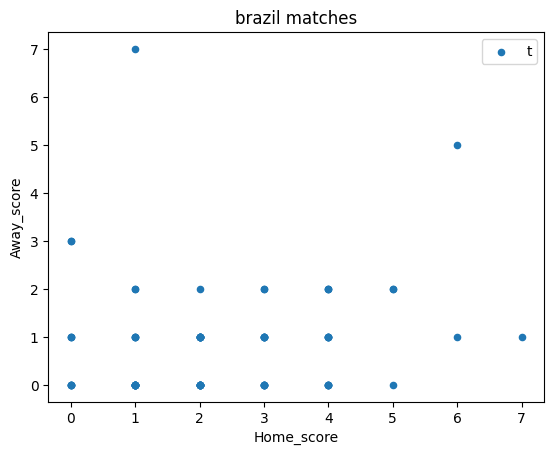

In [27]:
brazildf.plot(x='home_score',y='away_score',kind='scatter')
plt.xlabel('Home_score')
plt.ylabel('Away_score')
plt.legend('takeaway')
plt.title('brazil matches')
plt.show()

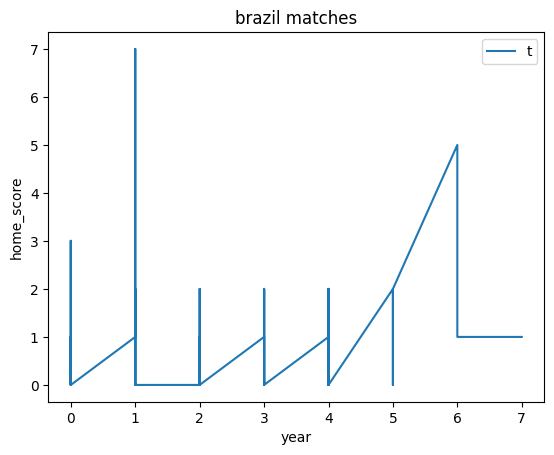

In [28]:
brazildf.plot(x='home_score',y='away_score',kind='line')
plt.xlabel('year')
plt.ylabel('home_score')
plt.legend('takeaway')
plt.title('brazil matches')
plt.show()

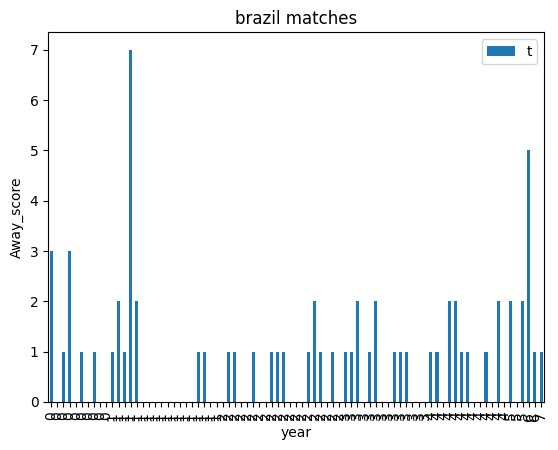

In [33]:
brazildf.plot(x='home_score',y='away_score',kind='bar')
plt.xlabel('year')
plt.ylabel('Away_score')
plt.legend('takeaway')
plt.title('brazil matches')
plt.show()

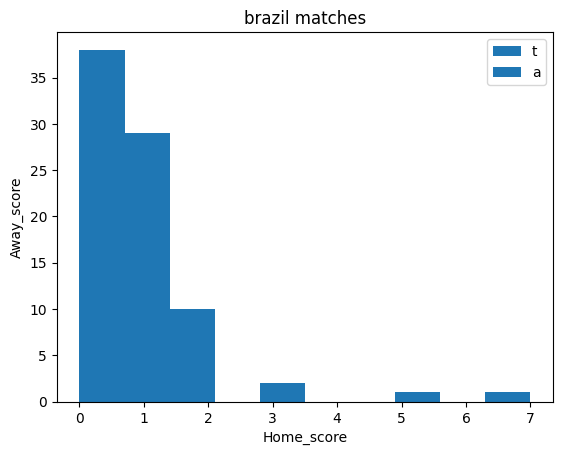

In [34]:
brazildf.plot(x='home_score',y='away_score',kind='hist')
plt.xlabel('Home_score')
plt.ylabel('Away_score')
plt.legend('takeaway')
plt.title('brazil matches')
plt.show()

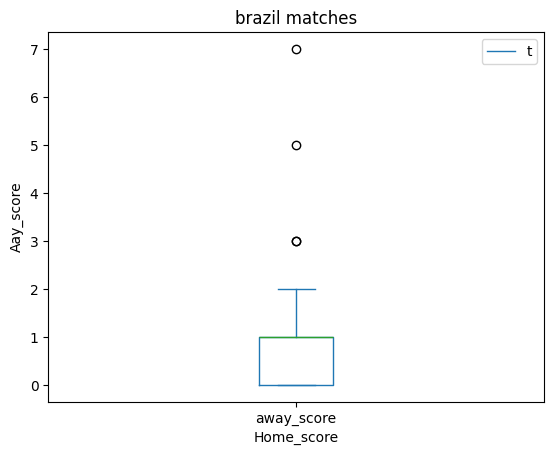

In [35]:
brazildf.plot(x='home_score',y='away_score',kind='box')
plt.xlabel('Home_score')
plt.ylabel('Aay_score')
plt.legend('takeaway')
plt.title('brazil matches')
plt.show()

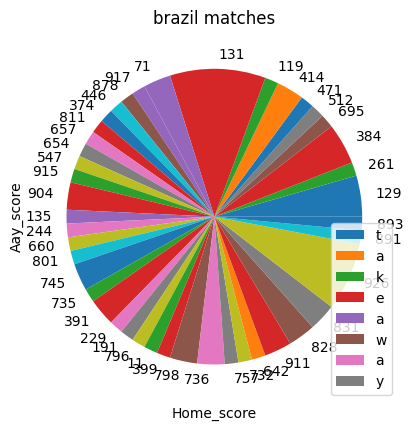

In [37]:
brazildf.plot(x='home_score',y='away_score',kind='pie')
plt.xlabel('Home_score')
plt.ylabel('Aay_score')
plt.legend('takeaway')
plt.title('brazil matches')
plt.show()

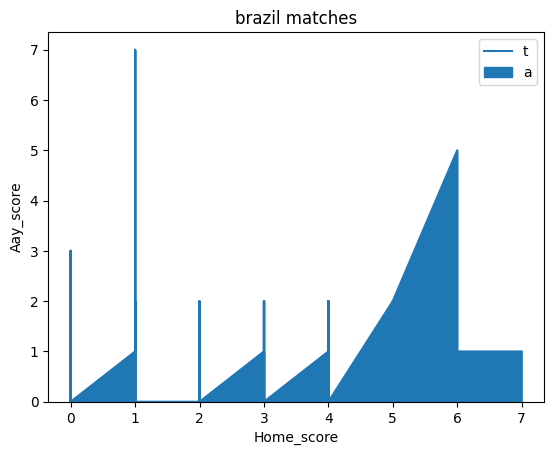

In [38]:
brazildf.plot(x='home_score',y='away_score',kind='area')
plt.xlabel('Home_score')
plt.ylabel('Aay_score')
plt.legend('takeaway')
plt.title('brazil matches')
plt.show()

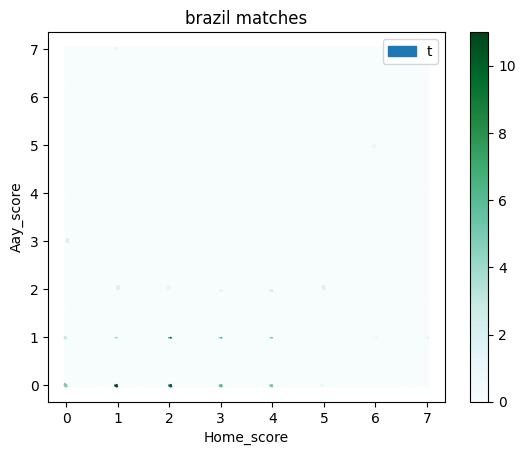

In [41]:
brazildf.plot(x='home_score',y='away_score',kind='hexbin')
plt.xlabel('Home_score')
plt.ylabel('Aay_score')
plt.legend('takeaway')
plt.title('brazil matches')
plt.show()